## Imports Section
All od the libraries below are not included with the standard python installation and must be downloaded using pip install package-name

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

In [2]:
us_confirmed_cases = pd.read_csv('./data/RAW_us_confirmed_cases.csv')
us_confirmed_cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17320,17320,17320,17320,17320


## Finding the UID
In order to find teh UID for Baltimore County I searched through the [UID lookup table](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv) and obtained it from the list

In [9]:
baltimore_uid = 84024005

In [39]:
baltimore_data = us_confirmed_cases[us_confirmed_cases['UID'] == baltimore_uid]
baltimore_data.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
1241,Maryland,Baltimore,84024005,US,USA,840,24005.0,US,39.457847,-76.62912,...,159745,159745,159817,159997,160070,160174,160279,160279,160279,160371


In [24]:
# Access just the cases data
cases_data = baltimore_data[baltimore_data.columns[11:]].values[0]

Text(0.5, 0, 'Days since 1/22/20')

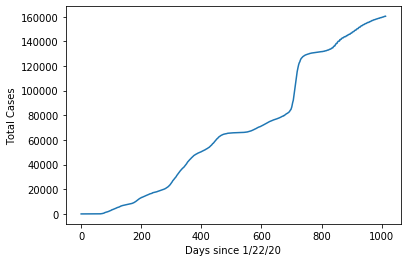

In [41]:
plt.plot(range(len(cases_data)),cases_data)
plt.ylabel('Total Cases')
plt.xlabel("Days since 1/22/20")

Text(0.5, 0, 'Days since 1/22/20')

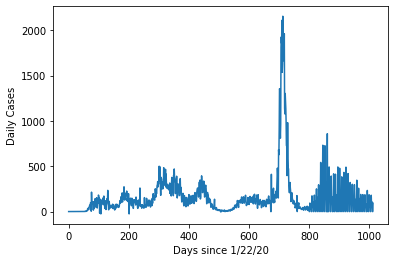

In [42]:
plt.plot(range(len(cases_data)-1),np.diff(cases_data))
plt.ylabel('Daily Cases')
plt.xlabel("Days since 1/22/20")

Text(0.5, 0, 'Days since 1/22/20')

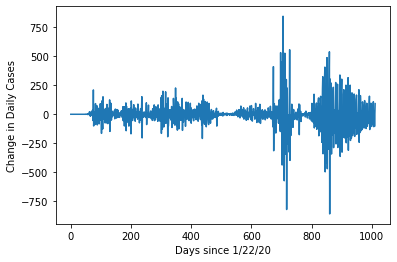

In [95]:
plt.plot(range(len(cases_data)-2),np.diff(np.diff(cases_data)))
plt.ylabel('Change in Daily Cases')
plt.xlabel("Days since 1/22/20")

## Exploring the Mask Use By Conty Dataset

In [33]:
mask_compliance = pd.read_csv('./data/mask-use-by-county.csv')
mask_compliance.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


Text(0.5, 1.0, 'Histogram of Percentage of people stating thaty they always mask')

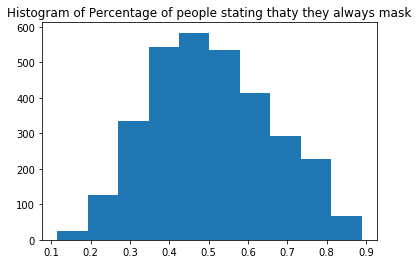

In [60]:
plt.hist(mask_compliance['ALWAYS'])
plt.title("Histogram of Percentage of people stating thaty they always mask")

## Finding the FP for Baltimore
Using the us counties 2021 index found [here](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv) I searched and found the FP for Baltimore county

In [34]:
county_fp = 24005

In [38]:
baltimore_mack_compliance = mask_compliance[mask_compliance['COUNTYFP'] == county_fp]
baltimore_mack_compliance.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1195,24005,0.013,0.024,0.043,0.142,0.777


In [88]:
# What percentile is Baltimore county in alwsys adhering to 
# Masking policy

# Find the percentage using bisection search
percentile_array = []
for c in baltimore_mack_compliance.columns[1:]:
    target = baltimore_mack_compliance[c].values[0]
    rng = (0,100)
    low = [rng[0], rng[1]/2]
    high = [rng[1]/2,rng[1]]
    for i in range(100):
        low_target = np.percentile(mask_compliance['ALWAYS'],(low[1]+low[0])/2)
        high_target = np.percentile(mask_compliance['ALWAYS'],(high[1]+high[0])/2)
        if np.abs(target-low_target) <  np.abs(target-high_target):
            low = [low[0],(low[1]+low[0])/2]
            high = [(low[1]+low[0])/2,(low[1])]
        else:
            low = [high[0],(high[1]+high[0])/2]
            high = [(high[1]+high[0])/2,(high[1])]
    percentile_array.append((c,low[0]))
print(percentile_array)

[('NEVER', 4.3368086899380734e-17), ('RARELY', 1.0842021724853072e-16), ('SOMETIMES', 4.3368086899380734e-17), ('FREQUENTLY', 0.077056884765625), ('ALWAYS', 95.3125)]


From percentiles,, it seems that Baltimore county was very good at masking up as they are in the 95th percentile for counties masking and in the other categories that arent as complient they are in very small percentiles

## Exploring Mask Mandates By County

In [36]:
mask_mandates = pd.read_csv('./data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [45]:
baltimore_mask_mandates = mask_mandates[mask_mandates['County_Name'] == 'Baltimore County']
baltimore_mask_mandates.head(2)

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
317903,MD,Baltimore County,24,5,4/10/2020,2,NaN,NaN,NaN,NaN
317904,MD,Baltimore County,24,5,4/11/2020,2,NaN,NaN,NaN,NaN


Here I remove the columns that dont contain any data with respect to masking policy. Even though we are supposed to begin the analysis on Febuary 1st 2020, it wouldnt make sense to only use the case data in an anslysis about the efficacy of masking policy. Therefore I will also cut the case data in order to match up with the masking policy data. Also I binarize the masking polic variable for easier use.

In [89]:
baltimore_mask_mandates = baltimore_mask_mandates[baltimore_mask_mandates['Face_Masks_Required_in_Public'].notna()]
baltimore_mask_mandates['Masks_Required'] = baltimore_mask_mandates['Face_Masks_Required_in_Public'].map({"Yes":1, "No":0}).values
baltimore_mask_mandates.head(2)

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Masks_Required
317911,MD,Baltimore County,24,5,4/18/2020,1,Yes,Official,https://governor.maryland.gov/wp-content/uploa...,"Md. Exec. Order No. 20-04-15-01 (Apr. 15, 2020)",1
317912,MD,Baltimore County,24,5,4/19/2020,1,Yes,Official,https://governor.maryland.gov/wp-content/uploa...,"Md. Exec. Order No. 20-04-15-01 (Apr. 15, 2020)",1


In [91]:
baltimore_mask_mandates['Citation'].unique()

array(['Md. Exec. Order No. 20-04-15-01 (Apr. 15, 2020)',
       'Md. Exec. Order No. 20-07-29-01 (July 29, 2020)',
       'Md. Exec. Order No. 20-08-03-01 (Aug. 3, 2020)',
       'Md. Exec. Order No. 20-09-01-01 (Sept. 1, 2020)',
       'Md. Exec. Order No. 20-09-18-01 (Sept. 18, 2020)',
       'Md. Exec. Order No. 20-09-28-01 (Sept. 28, 2020)',
       'Md. Exec. Order No. 20-10-16-02 (Oct. 16, 2020)',
       'Md. Exec. Order No. 20-11-10-01 (Nov. 10 2020)',
       'Md. Exec. Order No. 20-11-17-01 (Nov. 17 2020)',
       'Md. Exec. Order No. 21-01-28-01 (Jan. 28, 2021)',
       'Md. Exec. Order No. 21-02-23-01 (Feb. 23, 2021)',
       'Md. Exec. Order No. 21-03-09-01 (Mar. 9, 2021)',
       'Md. Exec. Order No. 21-04-21-01 (Apr. 21, 2021)',
       'Md. Exec. Order No. 21-04-28-01 (Apr. 28, 2021)',
       'Md. Exec. Order No. 21-05-14-01 (May 14, 2021)'], dtype=object)

## Looking into the policies that are enacted
There are 15 different policy statments made and each of them may be different
Here are the links to all 15
- [Md. Exec. Order No. 20-04-15-01 (Apr. 15, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/04/Masks-and-Physical-Distancing-4.15.20.pdf)
- [Md. Exec. Order No. 20-07-29-01 (July 29, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/07/Gatherings-10th-AMENDED-7.29.20.pdf)
- [Md. Exec. Order No. 20-08-03-01 (Aug. 3, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/08/2020-08-03-11-08.pdf)
- [Md. Exec. Order No. 20-09-01-01 (Sept. 1, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/09/Gatherings-12th-AMENDED-9.1.20.pdf)
- [Md. Exec. Order No. 20-09-18-01 (Sept. 18, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/09/Gatherings-13th-AMENDED-9.18.20.pdf)
- [Md. Exec. Order No. 20-09-28-01 (Sept. 28, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/09/Gatherings-14th-AMENDED-9.28.20.pdf)
- [Md. Exec. Order No. 20-10-16-02 (Oct. 16, 2020)](https://governor.maryland.gov/wp-content/uploads/2020/10/Gatherings-15th-AMENDED-10.16.20.pdf)
- [Md. Exec. Order No. 20-11-10-01 (Nov. 10 2020)](https://governor.maryland.gov/wp-content/uploads/2020/11/EO-11.10.20.pdf)
- [Md. Exec. Order No. 20-11-17-01 (Nov. 17 2020)](https://governor.maryland.gov/wp-content/uploads/2020/11/Order-20-11-17-01.pdf)
- [Md. Exec. Order No. 21-01-28-01 (Jan. 28, 2021)](https://governor.maryland.gov/wp-content/uploads/2021/01/Gatherings-18th-AMENDED-01.28.21.pdf)
- [Md. Exec. Order No. 21-02-23-01 (Feb. 23, 2021)](https://governor.maryland.gov/wp-content/uploads/2021/03/Gatherings-19th-AMENDED-02.23.21.pdf)
- [Md. Exec. Order No. 21-03-09-01 (Mar. 9, 2021)](https://governor.maryland.gov/wp-content/uploads/2021/03/Gatherings-20th-AMENDED-3.9.21.pdf)
- [Md. Exec. Order No. 21-04-21-01 (Apr. 21, 2021)](https://governor.maryland.gov/wp-content/uploads/2021/04/Gatherings-22d-AMENDED-4.28.21.pdf)
- Md. Exec. Order No. 21-04-28-01 (Apr. 28, 2021) - cannot find
- [Md. Exec. Order No. 21-05-14-01 (May 14, 2021)](https://governor.maryland.gov/wp-content/uploads/2021/05/Gatherings-24th-AMENDED-5.14.21.pdf)

## Categorizing Masking Policy Stringency
- (Apr. 15, 2020)
    - no large gatherings
    - physical distance for retail establishments
    - face coverings
- (July 29, 2020)
    - no large gatherings
    - social distincing
    - face coverings
    - places required to close
- (Aug. 3, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Sept. 1, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Sept. 18, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Sept. 28, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Oct. 16, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Nov. 10 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Nov. 17 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Jan. 28, 2020)
    - no large gatherings
    - social distancing
    - face coverings
    - places required to close
- (Feb. 23, 2021)
    - no large gatherings
    - social distancing
    - face coverings
- (Mar. 9, 2021)
    - face coverings
- (Apr. 21, 2021)
    - face coverings
- (Apr. 28, 2021) - cannot find
- (May 14, 2021)
    - Basically no mask mandate
Going to assume that the policy from April 21st was the same as the previous

The mapping is as follows
- 0: Basically no mandate
- 1: Face coverings required
- 2: No large Gatherings, face coverings required, and social distincing
- 3: No large Gatherings, places required to close down, face coverings required, and social distincing

In [93]:
## Mapping policys to values
baltimore_mask_mandates['Citation_Mapped'] = baltimore_mask_mandates['Citation'].map(
    {
       'Md. Exec. Order No. 20-04-15-01 (Apr. 15, 2020)' : 2,
       'Md. Exec. Order No. 20-07-29-01 (July 29, 2020)' : 3,
       'Md. Exec. Order No. 20-08-03-01 (Aug. 3, 2020)' :3,
       'Md. Exec. Order No. 20-09-01-01 (Sept. 1, 2020)':3,
       'Md. Exec. Order No. 20-09-18-01 (Sept. 18, 2020)':3,
       'Md. Exec. Order No. 20-09-28-01 (Sept. 28, 2020)':3,
       'Md. Exec. Order No. 20-10-16-02 (Oct. 16, 2020)':3,
       'Md. Exec. Order No. 20-11-10-01 (Nov. 10 2020)':3,
       'Md. Exec. Order No. 20-11-17-01 (Nov. 17 2020)':3,
       'Md. Exec. Order No. 21-01-28-01 (Jan. 28, 2021)':3,
       'Md. Exec. Order No. 21-02-23-01 (Feb. 23, 2021)':2,
       'Md. Exec. Order No. 21-03-09-01 (Mar. 9, 2021)': 1,
       'Md. Exec. Order No. 21-04-21-01 (Apr. 21, 2021)':1,
       'Md. Exec. Order No. 21-04-28-01 (Apr. 28, 2021)':1,
       'Md. Exec. Order No. 21-05-14-01 (May 14, 2021)':0 
    }
)

## Exploring the relationship between mandate stringency and daily cases

In [96]:
baltimore_mask_mandates[['date','Citation_Mapped']]

,date,Citation_Mapped
317911,4/18/2020,2
317912,4/19/2020,2
317913,4/20/2020,2
317914,4/21/2020,2
317915,4/22/2020,2
...,...,...
1131836,8/11/2021,0
1131837,8/12/2021,0
1131838,8/13/2021,0
1131839,8/14/2021,0


In [136]:
# Clip the cases so that timelines of mandate data match up with case data
# Also move back the dates 5 days as that is the average time it takes for someone
# To become symptomatic, and therefore have suspicion enough to take a test for covid 
clipped_case_data = baltimore_data[baltimore_data.columns[93:578]].values[0]

In [137]:
daily_vs_stringency = pd.DataFrame(data=np.array([baltimore_mask_mandates['Citation_Mapped'].values[1:],np.diff(clipped_case_data)]).T,columns=["Stringency", "Cases"])

This plot shows the relationship between mandate stringency and the daily number of cases. Higher numbers for stringency indicate more strict COVID policies. Now obviously this is an oversimplified model of stringency as there are many other factors that go into it that will have downstream impacts on daily cases than what were accounted for.

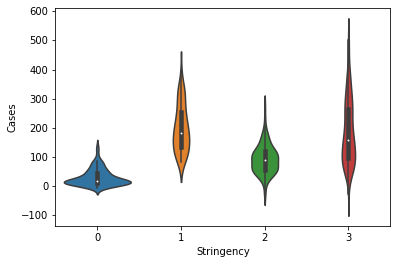

In [138]:
sns.violinplot(data=daily_vs_stringency,x='Stringency',y='Cases')

In [139]:
daily_vs_stringency.groupby('Stringency').var()

,Cases
Stringency,
0,801.666433
1,6250.154229
2,2428.766578
3,12087.411894


In [140]:
daily_vs_stringency.groupby('Stringency').mean()

,Cases
Stringency,
0,30.913978
1,199.238806
2,93.692308
3,187.729469


Since the magnitide of change will be smaller in the earlier stages we instead want to look a the percentage changes from day to day to see if mandates have an impact on that

In [148]:
daily_percent_vs_stringency = pd.DataFrame(data=np.array([baltimore_mask_mandates['Citation_Mapped'].values[1:],100*np.diff(clipped_case_data)/clipped_case_data[1:]]).T,columns=["Stringency", "Cases"])

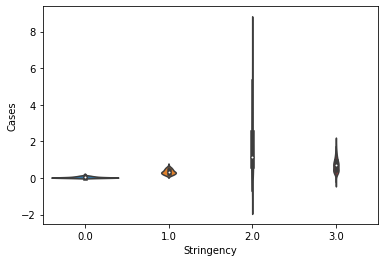

In [149]:
sns.violinplot(data=daily_percent_vs_stringency,x='Stringency',y='Cases')

This plot of the percentage change in daily rates shows interesting patterns similiar to a dampening harmonic oscilator. There could be some variable accountable for both the upticks and the decreases in these numbers related to masking policy

Text(0, 0.5, 'Percentage change in Daily cases')

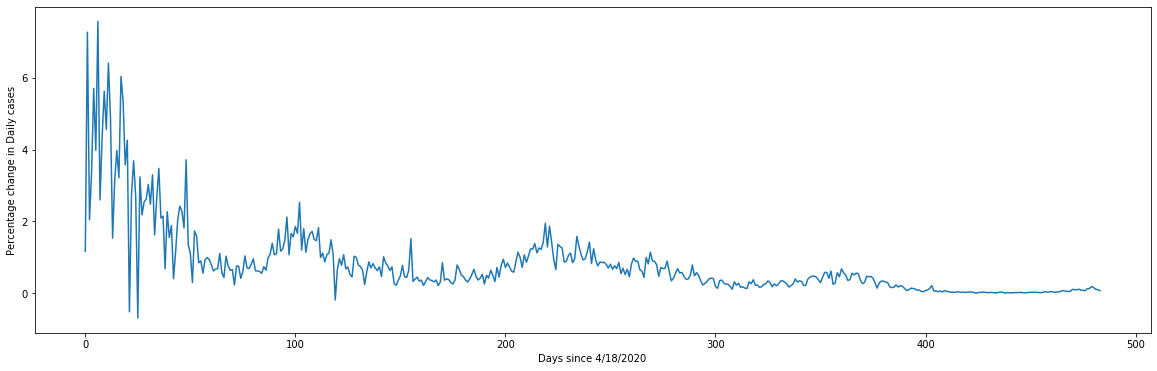

In [235]:
plt.plot(100*np.diff(clipped_case_data)/clipped_case_data[1:])
plt.xlabel("Days since 4/18/2020")
plt.ylabel("Percentage change in Daily cases")

In [176]:
daily_vs_stringency = pd.DataFrame(data=np.array([baltimore_mask_mandates['Citation_Mapped'].values[2:],np.diff(np.diff(clipped_case_data))]).T,columns=["Stringency", "Cases"])

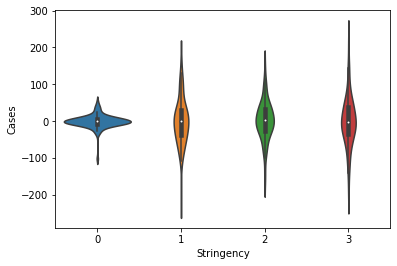

In [177]:
sns.violinplot(data=daily_vs_stringency,x='Stringency',y='Cases')

## Identify Changepoints And See If They Line Up With Any Policy Changes

In [181]:
model = "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(100*np.diff(clipped_case_data)/clipped_case_data[1:])

In [186]:
policy_change_timepoints = []
prev = None
for i,c in enumerate(baltimore_mask_mandates['Citation']):
    if c != prev:
        policy_change_timepoints.append(i)
    prev = c
policy_change_timepoints

[0, 104, 107, 139, 156, 163, 181, 207, 216, 285, 311, 325, 368, 375, 392]

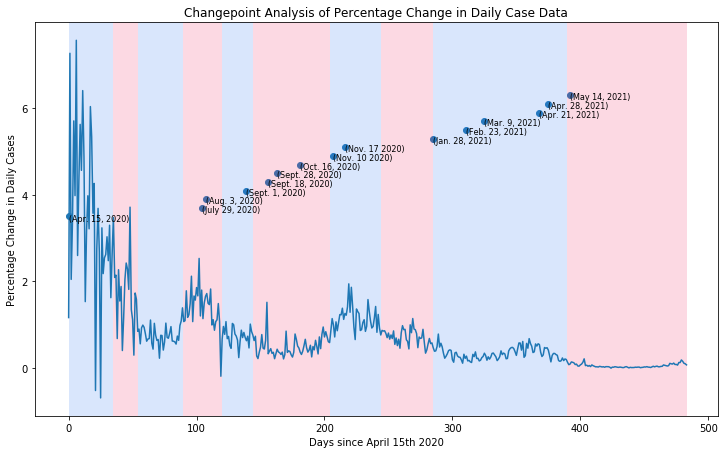

In [236]:
my_bkps = algo.predict(pen=3)
# show results
fig, ax_arr = rpt.display(100*np.diff(clipped_case_data)/clipped_case_data[1:], my_bkps, figsize=(10, 6))

ax_arr[0].scatter(policy_change_timepoints,[3.5+(i*.2) for i in range(len(policy_change_timepoints))])

labels = [s.replace('Md. Exec. Order No. ', '')[12:] for s in baltimore_mask_mandates['Citation'].values[policy_change_timepoints]]

for i in range(len(policy_change_timepoints)):
    ax_arr[0].annotate(labels[i], (policy_change_timepoints[i], 3.4+(i*.2)),fontsize=8)
plt.xlabel("Days since April 15th 2020")
plt.ylabel("Percentage Change in Daily Cases")
plt.title("Changepoint Analysis of Percentage Change in Daily Case Data")
plt.show()

## Further Investigation 
Based on the above graph there are a few interesting policy changes that lie before change points.
- Apr 15 2020
    - First legal mask mandate order
- July 29 2020 & Aug 3 2020 (because they lie at an inflection point)
    - Before only take out food, now people can eat outside and inside so long as there is less than 50% capacity
    - Theaters closed down
    - Gambling establishments allowed to open up
- Sept 18 2020
    - Establishments capacity increased to 75% from 50
    - Theaters allowed to open
- Nov 17  2020 (Because of inflection point proximity)
    - They had increased the occupancy limit of establishments in teh order before, however in this order they reduced it back to 50%
    - Reclosure of senior centers
    - Government gatherings limited
- April 28 2021
    - The one that I couldnt find the executive order for

These policy changes seem to have less to do with masking policy and more with the stringency of large gatherings. 